<a href="https://colab.research.google.com/github/gopessoa/RockPaperScissor/blob/main/RPS_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rock Paper Scissor identification neural network

## Seting Database

### Importando a database

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-06-23 15:57:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   171MB/s    in 1.1s    

2021-06-23 15:57:51 (171 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-06-23 15:57:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving t

### Descompactando os arquivos

In [10]:
import os
import zipfile
import tensorflow as tf

In [11]:
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [12]:
local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

### Training database

In [13]:
training_dir = "/tmp/rps/"
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)


In [14]:
training_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.


### Testing database

In [15]:
testing_dir = "/tmp/rps-test-set/"
testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)

In [16]:
testing_generator = testing_datagen.flow_from_directory(
    testing_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 372 images belonging to 3 classes.


## Setting Neural Network and Training the model

### Neural Network

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [22]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [25]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [27]:
history = model.fit_generator(training_generator, epochs=20, callbacks=[callbacks],
                              validation_data = testing_generator,
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
79/79 [==============================] - 167s 2s/step - loss: 0.0648 - accuracy: 0.9817 - val_loss: 0.8800 - val_accuracy: 0.8199
Epoch 2/20
79/79 [==============================] - 168s 2s/step - loss: 0.0251 - accuracy: 0.9937 - val_loss: 1.1034 - val_accuracy: 0.8226

Reached 90% accuracy so cancelling training!


In [29]:
classes = model.predict(testing_generator, batch_size=10)

In [30]:
classes

array([[4.4363760e-06, 9.9999559e-01, 4.2756209e-16],
       [1.4838047e-11, 9.9984169e-01, 1.5825096e-04],
       [9.5788097e-01, 8.1129861e-07, 4.2118292e-02],
       ...,
       [9.7592356e-06, 9.9999022e-01, 4.9608367e-10],
       [9.9945050e-01, 5.0981843e-04, 3.9712719e-05],
       [3.2393897e-01, 6.7564303e-01, 4.1803080e-04]], dtype=float32)

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image

In [56]:
# import files to test my nt
uploaded = files.upload()

Saving scissor.jfif to scissor (2).jfif


[[0. 1. 0.]]


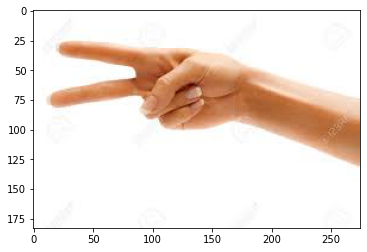

In [64]:
for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    plt.imshow(plt.imread(fn))
    print(classes)